In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def _prepare_covid(file_path, countries_list):   
    """
    It generate the covid-19 dataset for a given list of countries, up to 2021-07-10.
    """
    covid_cols = ['CountryName', 'RegionName', 'Date', 'ConfirmedCases', 'ConfirmedDeaths']
    
    # Main Covid-19 dataset
    df = pd.read_csv(file_path, index_col=0, parse_dates=['Date']).reset_index(drop=True)
    # Only Keep needed Columns
    df = df[covid_cols]
    # Filter for countries
    df_filtered = df.loc[df.CountryName.isin(countries_list)]
    # Exception for England
    if 'England' in countries_list:
        # Extract only England
        england = df.loc[(df.CountryName == 'United Kingdom') & (df.RegionName == 'England')]
        # Merge countries
        df_filtered = pd.concat([df_filtered, england], axis='rows', sort=False)
        # Change United Kingdom to England
        df_filtered.loc[df_filtered.CountryName == 'United Kingdom', 'CountryName'] = 'England'   
    
    if len(df_filtered) == 0:
        raise ValueError('Check the list of countries again. The output length is zero!')

    return df_filtered




def _preprocess_covid(covid_df):
    """
    # Fill missing values by interpolation, ffill, and filling NaN.
    # Creates new variables of interest.
    """
    df_new = covid_df.copy()
    # Interpolation & Drop country which no number of cases is available
    df_new['ConfirmedCases'] = df_new['ConfirmedCases'].interpolate(limit_area='inside')

    # Compute number of new cases and deaths each day
    df_new['NewCases'] = df_new.ConfirmedCases.diff().fillna(0)
    
    # Replace negative values (which do not make sense for these columns) with 0
    df_new['NewCases'] = df_new['NewCases'].clip(lower=0)
 
    return df_new

In [14]:
# USA
usa = _prepare_covid('../Data/Covid19_USA.csv', countries_list=['United States'])

### Iowa

,CountryName,RegionName,Date,ConfirmedCases,ConfirmedDeaths,NewCases
0,United States,Iowa,2020-01-01,NaN,NaN,0.0
1,United States,Iowa,2020-01-02,NaN,NaN,0.0
2,United States,Iowa,2020-01-03,NaN,NaN,0.0
3,United States,Iowa,2020-01-04,NaN,NaN,0.0
4,United States,Iowa,2020-01-05,NaN,NaN,0.0


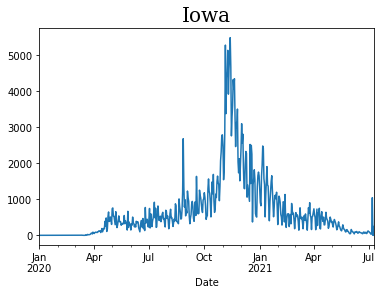

In [24]:
# Iowa
iowa = usa.loc[usa.RegionName == 'Iowa'].reset_index(drop=True)
iowa = _preprocess_covid(iowa)

# Plot
iowa.set_index('Date').NewCases.plot()
plt.title('Iowa', size=20, fontfamily='serif')

# Save
iowa.NewCases.astype('int64').to_csv('Iowa_NewCases.txt', index=False, header=False)

# Show
iowa.head()

### New York

,CountryName,RegionName,Date,ConfirmedCases,ConfirmedDeaths,NewCases
0,United States,New York,2020-01-01,NaN,NaN,0.0
1,United States,New York,2020-01-02,NaN,NaN,0.0
2,United States,New York,2020-01-03,NaN,NaN,0.0
3,United States,New York,2020-01-04,NaN,NaN,0.0
4,United States,New York,2020-01-05,NaN,NaN,0.0


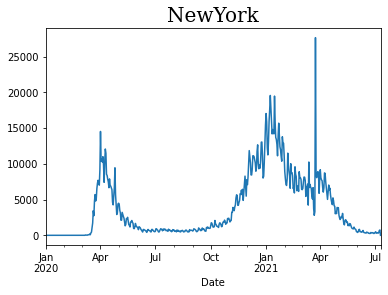

In [29]:
NewYork = usa.loc[usa.RegionName == 'New York'].reset_index(drop=True)
NewYork = _preprocess_covid(NewYork)

# Plot
NewYork.set_index('Date').NewCases.plot()
plt.title('NewYork', size=20, fontfamily='serif')

# Save
NewYork.NewCases.astype('int64').to_csv('NewYork_NewCases.txt', index=False, header=False)

# Show
NewYork.head()

# California

,CountryName,RegionName,Date,ConfirmedCases,ConfirmedDeaths,NewCases
0,United States,California,2020-01-01,NaN,NaN,0.0
1,United States,California,2020-01-02,NaN,NaN,0.0
2,United States,California,2020-01-03,NaN,NaN,0.0
3,United States,California,2020-01-04,NaN,NaN,0.0
4,United States,California,2020-01-05,NaN,NaN,0.0


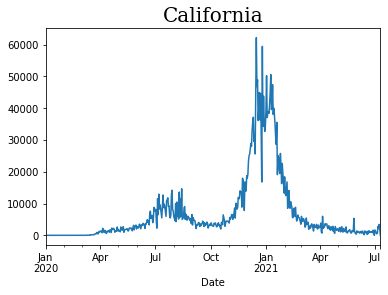

In [30]:
California = usa.loc[usa.RegionName == 'California'].reset_index(drop=True)
California = _preprocess_covid(California)

# Plot
California.set_index('Date').NewCases.plot()
plt.title('California', size=20, fontfamily='serif')

# Save
California.NewCases.astype('int64').to_csv('California_NewCases.txt', index=False, header=False)

# Show
California.head()